# LIBRARIES:
This is just initial setup
## Leave it Alone For Now

In [34]:
!pip install matplotlib
!pip install sklearn
!pip install seaborn
!pip install pandas

In [35]:
import matplotlib.pyplot as plt
from itertools import permutations
import sklearn
import sklearn.decomposition as dec
import sklearn.cluster as clu
import sklearn.model_selection as ms
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import datasets

PATH = "/home/jovyan/Dataset/"


# PlayZone
## Diabetes dataset 
Real world example \



We  load a dataset of diabetes data from the built in datasets of SKlearn

In [2]:
diabetes_data = datasets.load_diabetes()

Discussion about features

In [7]:
print(diabetes_data.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


Training and testing data

In [10]:
# Sperate train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_data.data, diabetes_data.target, test_size=0.2, random_state=0)

# YAAAY WORK

In [11]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

0.33222203269065154

## WHAT`S NEXT

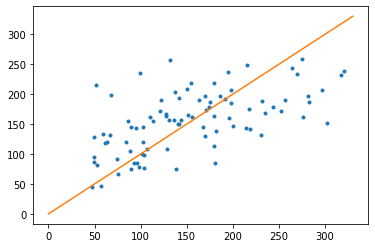

In [12]:
# plot prediction and actual data
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

# LOgistic Regression

In [16]:
iris_data = datasets.load_iris()
# Heyy pay attention to this 

In [21]:
print(iris_data.target_names)
print(iris_data.feature_names)


['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Text(0, 0.5, 'Sepal width')

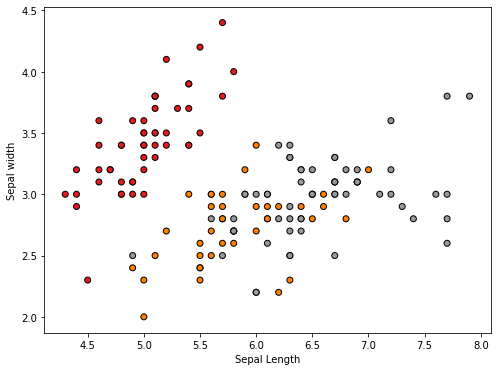

In [25]:
X = iris_data.data[:, :2]
y = iris_data.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')

In [26]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model

/home/gloriouseggroll/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gloriouseggroll/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

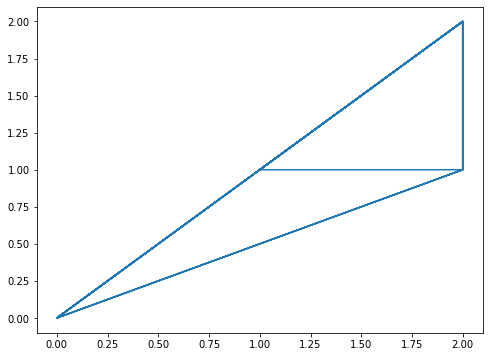

In [32]:
y_pred = model.predict(x_test)
plt.figure(2, figsize=(8, 6))

plt.plot(y_pred, y_test)

In [33]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.8333333333333334


## CLUSTERING

Making a random dataset with three clusters

In [37]:
X, y = datasets.make_blobs(n_samples=200,
                         n_features=2,
                         centers=3,
                         cluster_std=1.5)

## Methods to deal with riffraff

In [38]:
def relabel(cl):
    """Relabel a clustering with three clusters
    to match the original classes"""
    if np.max(cl) != 2:
        return cl
    perms = np.array(list(permutations((0, 1, 2))))
    i = np.argmin([np.sum(np.abs(perm[cl] - y))
                  for perm in perms])
    p = perms[i]
    return p[cl]

In [39]:
def display_clustering(labels, title):
    """Plot the data points with the cluster
    colors."""
    
    # We relabel the classes when there are 3 clusters
    labels = relabel(labels)
    fig, axes = plt.subplots(1, 2, figsize=(8, 3),
                            sharey=True)
    # Display the points with the true labels on the 
    # left, and with the clustering labels on the
    # right
    for ax, c, title in zip(
            axes,
            [y, labels],
            ["True labels", title]):
        ax.scatter(X[:, 0], X[:, 1], c=c, s=30,
                  linewidths=0, cmap=plt.cm.rainbow)
        ax.set_title(title)

## Yaay Models again

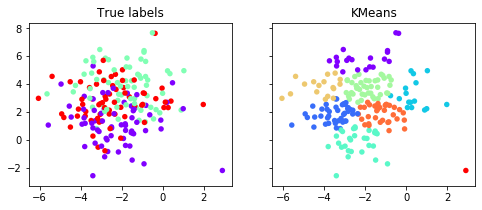

In [40]:
km = clu.KMeans()
km.fit(X)
display_clustering(km.labels_, "KMeans")

**When we set the number of cluster**

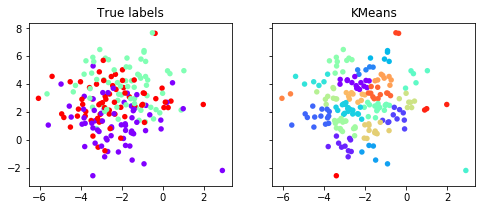

In [45]:
km = clu.KMeans(n_clusters=24)
km.fit(X)
display_clustering(km.labels_, "KMeans")

## NOW WE GET DOWN AND DIRTY

In [50]:
def data_loader(file_name):
    load_path = PATH.join(file_name)
    return pd.read_csv(load_path)
    